I need the samples for clustering redshifts: 

- shape catalogue from alex justin
- shape catalogue randoms (after applying rm mask)
- redmagic from mastercat
- redmagic randoms from mastercat

to shapes and rm randoms, the rm mask has to be applied. 
Also, to the shape catalogue, I need to select a select_flag == 0. 



In [ ]:
%matplotlib inline
import healpy as hp
import numpy as np
import matplotlib.pyplot as plt

def convert_to_pix_coord(ra, dec, nside=1024,nest=False):
    """
    Converts RA,DEC to hpix coordinates
    """

    theta = (90.0 - dec) * np.pi / 180.
    #print theta
    phi = ra * np.pi / 180.
    pix = hp.ang2pix(nside, theta, phi, nest=nest)

    return pix

def IndexToDeclRa(index, nside=1024,nest= False):
    theta,phi=hp.pixelfunc.pix2ang(nside ,index,nest=nest)
    return -np.degrees(theta-np.pi/2.),np.degrees(phi)

def generate_randoms_radec(minra, maxra, mindec, maxdec, Ngen, raoffset=0):
    r = 1.0
    # this z is not redshift!
    zmin = r * np.sin(np.pi * mindec / 180.)
    zmax = r * np.sin(np.pi * maxdec / 180.)
   
    # parity transform from usual, but let's not worry about that
    phimin = np.pi / 180. * (minra - 180 + raoffset)
    phimax = np.pi / 180. * (maxra - 180 + raoffset)
   
    # generate ra and dec
    z_coord = np.random.uniform(zmin, zmax, Ngen)  # not redshift!
    phi = np.random.uniform(phimin, phimax, Ngen)
    dec_rad = np.arcsin(z_coord / r)
   
    # convert to ra and dec
    ra = phi * 180 / np.pi + 180 - raoffset
    dec = dec_rad * 180 / np.pi
    return ra, dec




# Make files for clustering-z (data: WL sources and RM)

In [ ]:
import h5py
import numpy as np

mastercat_v = '12_3_19'

path_mastercat = '/project/projectdirs/des/www/y3_cats/Y3_mastercat_'+mastercat_v+'.h5'
path_to_save = '/global/cscratch1/sd/mgatti/clustering_z/data/'


mastercat = h5py.File(path_mastercat,'r')

# WL sample ******

select = np.array(mastercat['index']['select'])
R11 = np.array(mastercat['catalog']['metacal']['unsheared']['R11'])[select]
R22 = np.array(mastercat['catalog']['metacal']['unsheared']['R22'])[select]
w = (R11+R22)/2.
e1  = np.array(mastercat['catalog']['metacal']['unsheared']['e_1'])[select]
e2 = np.array(mastercat['catalog']['metacal']['unsheared']['e_2'])[select]
snr = np.array(mastercat['catalog']['metacal']['unsheared']['snr'])[select]

ra  = np.array(mastercat['catalog']['metacal']['unsheared']['ra'])[select]
dec = np.array(mastercat['catalog']['metacal']['unsheared']['dec'])[select]
bin_index = np.array(mastercat['catalog']['sompz']['unsheared']['bhat'])[select]


# RMG sample **************************
select = np.array(mastercat['index']['redmagic']['combined_sample_fid']['select'])
z_rm =  np.array(mastercat['catalog']['redmagic']['combined_sample_fid']['zredmagic'])[select]
w_rm =  np.array(mastercat['catalog']['redmagic']['combined_sample_fid']['weight'])[select]
ra_rm =  np.array(mastercat['catalog']['redmagic']['combined_sample_fid']['ra'])[select]
dec_rm =  np.array(mastercat['catalog']['redmagic']['combined_sample_fid']['dec'])[select]

# random *********************************************
select = np.array(mastercat['index']['redmagic']['combined_sample_fid']['random_select'])
ra_rm_random =  np.array(mastercat['randoms']['redmagic']['combined_sample_fid']['ra'])[select]
dec_rm_random  =  np.array(mastercat['randoms']['redmagic']['combined_sample_fid']['dec'])[select]
mastercat.close()


from astropy.table import Table
import os
path = path_to_save + '/shape_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra
fits_f['dec'] = dec
fits_f['e1'] = e1
fits_f['e2'] = e2
fits_f['tomo_bin'] = bin_index
fits_f['w'] = w
fits_f['snr'] = snr
fits_f.write(path)


from astropy.table import Table
import os
path = path_to_save + '/redmagic_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm
fits_f['dec'] = dec_rm
fits_f['z'] = z_rm
fits_f['w'] = w_rm
fits_f.write(path)


from astropy.table import Table
import os
path = path_to_save + '/redmagic_random_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm_random
fits_f['dec'] = dec_rm_random
fits_f.write(path)
print ('done')



# RMG sample **************************
select = np.array(mastercat['index']['redmagic']['higherlum']['select'])
z_rm =  np.array(mastercat['catalog']['redmagic']['higherlum']['zredmagic'])[select]
w_rm =  np.array(mastercat['catalog']['redmagic']['higherlum']['weight'])[select]
ra_rm =  np.array(mastercat['catalog']['redmagic']['higherlum']['ra'])[select]
dec_rm =  np.array(mastercat['catalog']['redmagic']['higherlum']['dec'])[select]

# random *********************************************
select = np.array(mastercat['index']['redmagic']['higherlum']['random_select'])
ra_rm_random =  np.array(mastercat['randoms']['redmagic']['higherlum']['ra'])[select]
dec_rm_random  =  np.array(mastercat['randoms']['redmagic']['higherlum']['dec'])[select]
mastercat.close()



from astropy.table import Table
import os
path = path_to_save + '/redmagic_higherlum_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm
fits_f['dec'] = dec_rm
fits_f['z'] = z_rm
fits_f['w'] = w_rm
fits_f.write(path)


from astropy.table import Table
import os
path = path_to_save + '/redmagic_higherlum_random_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm_random
fits_f['dec'] = dec_rm_random
fits_f.write(path)
print ('done')


# RMG sample **************************
select = np.array(mastercat['index']['redmagic']['highlum']['select'])
z_rm =  np.array(mastercat['catalog']['redmagic']['highlum']['zredmagic'])[select]
w_rm =  np.array(mastercat['catalog']['redmagic']['highlum']['weight'])[select]
ra_rm =  np.array(mastercat['catalog']['redmagic']['highlum']['ra'])[select]
dec_rm =  np.array(mastercat['catalog']['redmagic']['highlum']['dec'])[select]

# random *********************************************
select = np.array(mastercat['index']['redmagic']['highlum']['random_select'])
ra_rm_random =  np.array(mastercat['randoms']['redmagic']['highlum']['ra'])[select]
dec_rm_random  =  np.array(mastercat['randoms']['redmagic']['highlum']['dec'])[select]
mastercat.close()



from astropy.table import Table
import os
path = path_to_save + '/redmagic_highlum_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm
fits_f['dec'] = dec_rm
fits_f['z'] = z_rm
fits_f['w'] = w_rm
fits_f.write(path)


from astropy.table import Table
import os
path = path_to_save + '/redmagic_highlum_random_Y3_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm_random
fits_f['dec'] = dec_rm_random
fits_f.write(path)
print ('done')


# Make files for clustering-z (data: eboss / WL sources and RM)

In [ ]:
import astropy.io.fits as pf
import astropy.io.fits as pf
eboss = pf.open("/global/cscratch1/sd/giannini/clusteringz/Y3data/data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight.fits")
ra_eboss = eboss[1].data['RA']
dec_eboss = eboss[1].data['DEC']
z_eboss = eboss[1].data['z']
w_eboss = eboss[1].data['TOT_WEIGHT_RC' ]

eboss_rdm = pf.open("/global/cscratch1/sd/giannini/clusteringz/Y3data/data/eBOSS_BOSS_all5_v7nov19_y3cuts_totweight_randoms.fits")
ra_rndm_eboss = eboss_rdm[1].data['RA']
dec_rndm_eboss = eboss_rdm[1].data['DEC']
z_rndm_eboss = eboss_rdm[1].data['Z']
w_rndm_eboss = eboss_rdm[1].data['TOT_WEIGHT_RC']

15.14183580221316
1.5771073789941714
65.33306071985318
15.14183580221316
1.5771073789941714
65.33306071985318


TypeError: 'int' object is not callable

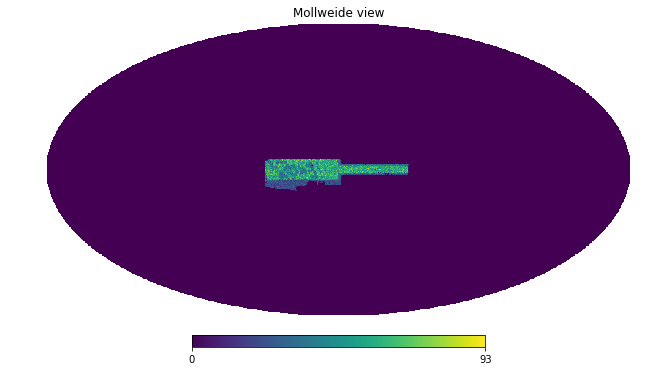

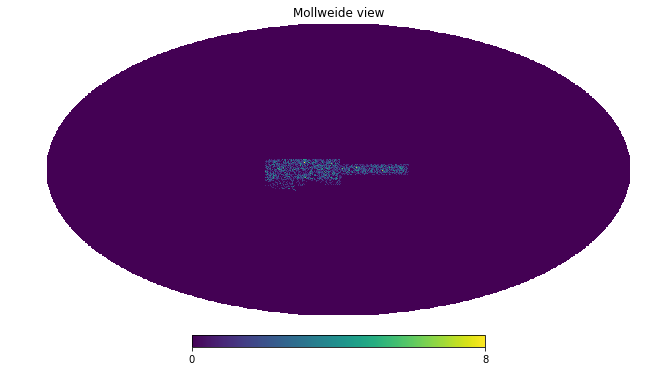

In [40]:
# make pixel map from randoms
nside = 1024
eboss_rndm_map = np.zeros(hp.nside2npix(nside))
eboss_map = np.zeros(hp.nside2npix(nside))

pix_rnmd = convert_to_pix_coord(ra_rndm_eboss,dec_rndm_eboss, nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix_rnmd, return_index=True, return_inverse=True)
eboss_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rnmd)))

pix = convert_to_pix_coord(ra_eboss,dec_eboss, nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix, return_index=True, return_inverse=True)
eboss_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix)))

hp.mollview(eboss_rndm_map)
hp.mollview(eboss_map)

# make mask for WL and rm
rm_rndm_map = np.zeros(hp.nside2npix(nside))
rm_map = np.zeros(hp.nside2npix(nside))
wl_map = np.zeros(hp.nside2npix(nside))

pix_rndm_rm = convert_to_pix_coord(ra_rm_random,dec_rm_random, nside=nside)
pix_rm = convert_to_pix_coord(ra_rm,dec_rm, nside=nside)
pix_wl = convert_to_pix_coord(ra,dec, nside=nside)

unique_pix1, idx1, idx_rep1 = np.unique(pix_rndm_rm, return_index=True, return_inverse=True)
rm_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rndm_rm)))

unique_pix1, idx1, idx_rep1 = np.unique(pix_rm, return_index=True, return_inverse=True)
rm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rm)))

unique_pix1, idx1, idx_rep1 = np.unique(pix_wl, return_index=True, return_inverse=True)
wl_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_wl)))


print np.mean(rm_rndm_map[eboss_rndm_map!=0])
print np.mean(rm_map[eboss_rndm_map!=0])
print np.mean(wl_map[eboss_rndm_map!=0])

print np.mean(rm_rndm_map[eboss_rndm_map!=0])
print np.mean(rm_map[eboss_rndm_map!=0])
print np.mean(wl_map[eboss_rndm_map!=0])
  
    
common_mask = ((eboss_rndm_map!=0 ) & (rm_rndm_map!=0))
pix_mask_fial = np.arange(len(common_mask))[common_mask]


mask_wl_final = np.in1d(pix_wl,pix_mask_fial)
    
from astropy.table import Table
import os
path = path_to_save + '/shape_Y3_'+mastercat_v+'_ebossv.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra[mask_wl_final ]
fits_f['dec'] = dec[mask_wl_final ]
fits_f['e1'] = e1[mask_wl_final ]
fits_f['e2'] = e2[mask_wl_final ]
fits_f['tomo_bin'] = bin_index[mask_wl_final ]
fits_f['w'] = w[mask_wl_final ]
fits_f['snr'] = snr[mask_wl_final ]
fits_f.write(path)


mask_rm_final = np.in1d(pix_rm,pix_mask_fial)
   
    
from astropy.table import Table
import os
path = path_to_save + '/redmagic_Y3_'+mastercat_v+'_ebossv.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm[mask_rm_final]
fits_f['dec'] = dec_rm[mask_rm_final]
fits_f['z'] = z_rm[mask_rm_final]
fits_f['w'] = w_rm[mask_rm_final]
fits_f.write(path)


from astropy.table import Table
import os

mask_rm_rndm_final = np.in1d(pix_rndm_rm,pix_mask_fial)
   
    
path = path_to_save + '/redmagic_random_Y3_'+mastercat_v+'_ebossv.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rm_random[mask_rm_rndm_final]
fits_f['dec'] = dec_rm_random[mask_rm_rndm_final]
fits_f.write(path)
print ('done')





mask_eboss_final = np.in1d(pix,pix_mask_fial)
  

path = path_to_save + '/eboss_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_eboss[mask_eboss_final]
fits_f['dec'] = dec_eboss[mask_eboss_final]
fits_f['z'] = z_eboss[mask_eboss_final]
fits_f['w'] = w_eboss[mask_eboss_final]

fits_f.write(path)
print ('done')

mask_eboss_rndm_final = np.in1d(pix_rnmd,pix_mask_fial)
  

path = path_to_save + '/eboss_rndm_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rndm_eboss[mask_eboss_rndm_final]
fits_f['dec'] = dec_rndm_eboss[mask_eboss_rndm_final]
fits_f['z'] = z_rndm_eboss[mask_eboss_rndm_final]
fits_f['w'] = w_rndm_eboss[mask_eboss_rndm_final]
fits_f.write(path)
print ('done')




# re checks

eboss_rndm_map = np.zeros(hp.nside2npix(nside))
eboss_map = np.zeros(hp.nside2npix(nside))

pix_rnmd = convert_to_pix_coord(ra_rndm_eboss[mask_eboss_rndm_final],dec_rndm_eboss[mask_eboss_rndm_final], nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix_rnmd, return_index=True, return_inverse=True)
eboss_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rnmd)))
eboss_rndm_map[eboss_rndm_map!=0.]=1

pix = convert_to_pix_coord(ra_eboss[mask_eboss_final],dec_eboss[mask_eboss_final], nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix, return_index=True, return_inverse=True)
eboss_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix)))
eboss_map[eboss_map!=0.]=1

hp.mollview(eboss_rndm_map)
hp.mollview(eboss_map)

# make mask for WL and rm
rm_rndm_map = np.zeros(hp.nside2npix(nside))
rm_map = np.zeros(hp.nside2npix(nside))
wl_map = np.zeros(hp.nside2npix(nside))

pix_rndm_rm = convert_to_pix_coord(ra_rm_random[mask_rm_rndm_final],dec_rm_random[mask_rm_rndm_final], nside=nside)
pix_rm = convert_to_pix_coord(ra_rm[mask_rm_final ],dec_rm[mask_rm_final ], nside=nside)
pix_wl = convert_to_pix_coord(ra[mask_wl_final ],dec[mask_wl_final ], nside=nside)

unique_pix1, idx1, idx_rep1 = np.unique(pix_rndm_rm, return_index=True, return_inverse=True)
rm_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rndm_rm)))
rm_rndm_map[rm_rndm_map!=0.]=1

unique_pix1, idx1, idx_rep1 = np.unique(pix_rm, return_index=True, return_inverse=True)
rm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rm)))
rn_map[rn_map!=0.]=1

unique_pix1, idx1, idx_rep1 = np.unique(pix_wl, return_index=True, return_inverse=True)
wl_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_wl)))
wl_map[wl_map!=0.]=1

       

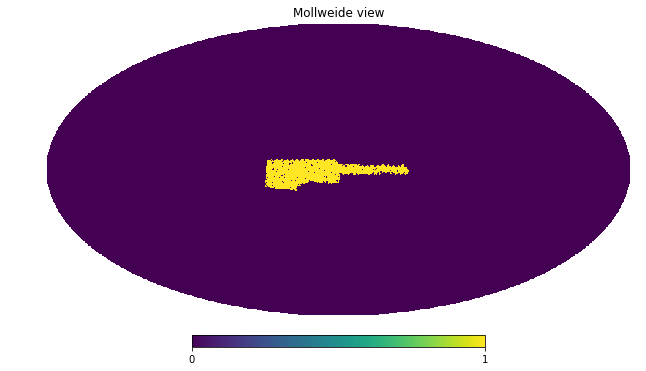

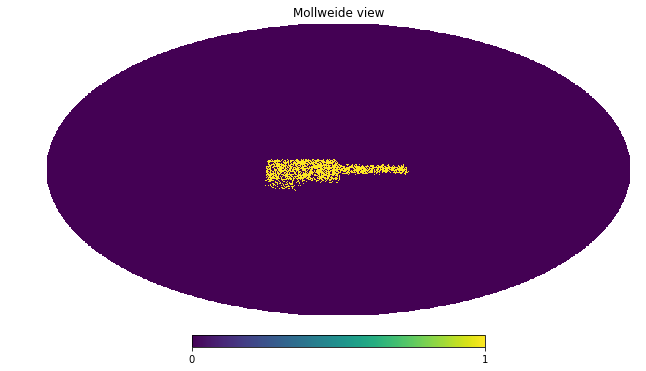

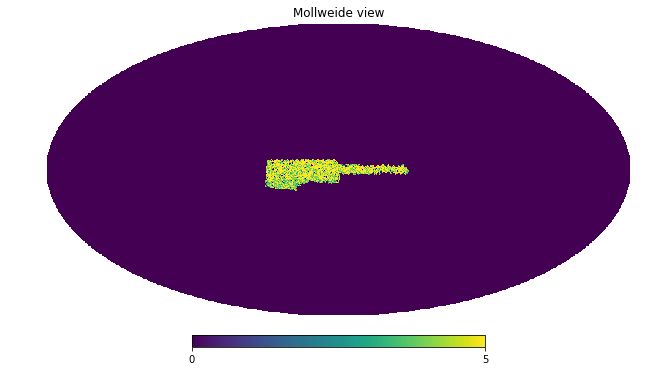

In [43]:
# re checks

eboss_rndm_map = np.zeros(hp.nside2npix(nside))
eboss_map = np.zeros(hp.nside2npix(nside))

pix_rnmd = convert_to_pix_coord(ra_rndm_eboss[mask_eboss_rndm_final],dec_rndm_eboss[mask_eboss_rndm_final], nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix_rnmd, return_index=True, return_inverse=True)
eboss_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rnmd)))
eboss_rndm_map[eboss_rndm_map!=0.]=1

pix = convert_to_pix_coord(ra_eboss[mask_eboss_final],dec_eboss[mask_eboss_final], nside=nside)
unique_pix1, idx1, idx_rep1 = np.unique(pix, return_index=True, return_inverse=True)
eboss_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix)))
eboss_map[eboss_map!=0.]=1

# make mask for WL and rm
rm_rndm_map = np.zeros(hp.nside2npix(nside))
rm_map = np.zeros(hp.nside2npix(nside))
wl_map = np.zeros(hp.nside2npix(nside))

pix_rndm_rm = convert_to_pix_coord(ra_rm_random[mask_rm_rndm_final],dec_rm_random[mask_rm_rndm_final], nside=nside)
pix_rm = convert_to_pix_coord(ra_rm[mask_rm_final ],dec_rm[mask_rm_final ], nside=nside)
pix_wl = convert_to_pix_coord(ra[mask_wl_final ],dec[mask_wl_final ], nside=nside)

unique_pix1, idx1, idx_rep1 = np.unique(pix_rndm_rm, return_index=True, return_inverse=True)
rm_rndm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rndm_rm)))
rm_rndm_map[rm_rndm_map!=0.]=1

unique_pix1, idx1, idx_rep1 = np.unique(pix_rm, return_index=True, return_inverse=True)
rm_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_rm)))
rm_map[rm_map!=0.]=1

unique_pix1, idx1, idx_rep1 = np.unique(pix_wl, return_index=True, return_inverse=True)
wl_map[unique_pix1] += np.bincount(idx_rep1, weights=np.ones(len(pix_wl)))
wl_map[wl_map!=0.]=1

hp.mollview(wl_map+rm_map+rm_rndm_map+eboss_map+eboss_rndm_map)

In [ ]:
path = path_to_save + '/eboss_rndm_'+mastercat_v+'.fits'
if os.path.exists(path):
    os.remove(path)
fits_f = Table()
fits_f['ra'] = ra_rndm_eboss[mask_eboss_rndm_final]
fits_f['dec'] = dec_rndm_eboss[mask_eboss_rndm_final]
fits_f['z'] = z_rndm_eboss[mask_eboss_rndm_final]
fits_f['w'] = w_rndm_eboss[mask_eboss_rndm_final]
fits_f.write(path)
print ('done')

# Make file x sims:

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

import h5py
import pyfits as pf
path_to_save = '/global/cscratch1/sd/mgatti/clustering_z/data/'
version = 'v1.9.8_Y3a'
mastercat = h5py.File('/global/cscratch1/sd/jderose/BCC/Chinchilla/Herd/Chinchilla-3/sampleselection/Y3a_old/Buzzard-3_+'version+'_mastercat.h5','r')

# redmagic mask *****************
hpix = np.array(mastercat['masks']['redmagic']['combined_sample_fid']['hpix'])
mask_rm = np.zeros(hp.pixelfunc.nside2npix(nside))
mask_rm[hpix] = True


# load redshifts into memory for subsequent tests *******************

zredmagic_tot = mastercat['catalog']['redmagic']['combined_sample_fid']['zredmagic']
zspec_tot = mastercat['catalog']['redmagic']['combined_sample_fid']['zspec']
zredmagic_tot_hd = mastercat['catalog']['redmagic'][u'highdens']['zredmagic']
zspec_tot_hd = mastercat['catalog']['redmagic'][u'highdens']['zspec']
zredmagic_tot_hl = mastercat['catalog']['redmagic']['highlum']['zredmagic']
zspec_tot_hl = mastercat['catalog']['redmagic']['highlum']['zspec']
zredmagic_tot_hll = mastercat['catalog']['redmagic'][u'higherlum']['zredmagic']
zspec_tot_hll = mastercat['catalog']['redmagic'][u'higherlum']['zspec']

# save outputs ***************************
from astropy.table import Table
rm_files = ['combined_sample_fid','higherlum','highlum']
for rm_file in m_riles:
    path = path_to_save + 'data/Buzzard_+'version+'_redMagic_'+rm_file+'_Y3.fits'
    if os.path.exists(path):
        os.remove(path)
    
    fits_f = Table()
    fits_f['RA'] = mastercat['catalog'][ 'redmagic'][rm_file]['ra']
    fits_f['DEC'] = mastercat['catalog'][ 'redmagic'][rm_file]['dec']
    fits_f['ZREDMAGIC'] = mastercat['catalog'][ 'redmagic'][rm_file]['zredmagic']
    fits_f['Z'] = mastercat['catalog'][ 'redmagic'][rm_file]['zspec']
    fits_f['weight'] = mastercat['catalog'][ 'redmagic'][rm_file]['weights']
    fits_f.write(path)

    
    
for rm_file in m_riles:
    path = path_to_save + 'data/Buzzard_+'version+'_redMagic_random_'+rm_file+'_Y3.fits'
    if os.path.exists(path):
        os.remove(path)
    
    fits_f = Table()
    fits_f['RA'] = mastercat['randoms'][ 'redmagic'][rm_file]['ra']
    fits_f['DEC'] = mastercat['randoms'][ 'redmagic'][rm_file]['dec']
    fits_f.write(path)

    
    
    
    
# save WL sample after applying the mask *******

/global/homes/m/mgatti/.conda/envs/myenv_up/lib/python2.7/site-packages/pyfits/__init__.py:22: PyFITSDeprecationWarning: PyFITS is deprecated, please use astropy.io.fits
  PyFITSDeprecationWarning)  # noqa


In [ ]:
import astropy.io.fits as pf
wide = pf.open('/global/cscratch1/sd/giannini/clusteringz/wide.fits')

e1_sh = wide[1].data['E1']
e2_sh = wide[1].data['E2']
id_obj_sh =  wide[1].data['COADD_OBJECT_ID']#[mask_wl]                                                                                   
ra_sh = wide[1].data['RA']#[#mask_wl]                                                                                                     
dec_sh = wide[1].data['DEC']#[mask_wl]                                                                                                    
flux_i_sh = wide[1].data['FLUX_I']
tomo_bin = wide[1].data['tomo_bin_wide']
z_sh = wide[1].data['Z']
hpix_sh = wide[1].data['HPIX_16384']

e1_sh = e1_sh.byteswap().newbyteorder()
e2_sh = e2_sh.byteswap().newbyteorder()
id_obj_sh = id_obj_sh.byteswap().newbyteorder()
ra_sh = ra_sh.byteswap().newbyteorder()
dec_sh = dec_sh.byteswap().newbyteorder()
flux_i_sh = flux_i_sh.byteswap().newbyteorder()
tomo_bin = tomo_bin.byteswap().newbyteorder()
z_sh = z_sh.byteswap().newbyteorder()
hpix_sh = hpix_sh.byteswap().newbyteorder()

import pandas as pf
e1_sh = pd.DataFrame(e1_sh)
e2_sh = pd.DataFrame(e2_sh)
id_obj_sh =  pd.DataFrame(id_obj_sh)                                                                          
ra_sh = pd.DataFrame(ra_sh)
dec_sh = pd.DataFrame(dec_sh)
flux_i_sh = pd.DataFrame(flux_i_sh)
tomo_bin = pd.DataFrame(tomo_bin)
z_sh = pd.DataFrame(z_sh)
hpix_sh = pd.DataFrame(hpix_sh)

# apply rm mask
pix_sample = convert_to_pix_coord(ra_sh, dec_sh,nside,nest=True)
mask_rm = np.in1d(pix_sample,hpix)


from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
path = folder + 'data/shape_Y3.fits'
fits_f = Table()
fits_f['ra'] = ra_sh[mask_rm]
fits_f['dec'] = dec_sh[mask_rm]
fits_f['e1'] = e1_sh[mask_rm]
fits_f['e2'] = e2_sh[mask_rm]
fits_f['z'] = z_sh[mask_rm]
fits_f['tomo_bin'] = tomo_bin[mask_rm]
fits_f['id_obj'] = id_obj_sh[mask_rm]
fits_f['flux_i'] = flux_i_sh[mask_rm]
fits_f.write(path)




from astropy.table import Table
# folder = "/global/cscratch1/sd/giannini/clusteringz/wz/data/"
tbins = 4
for t in range(tbins):
    mask_tbin = np.array(tomo_bin[mask_rm] == t)
    path = folder + 'data/shape_Y3_tbin{0}.fits'.format(t)
    fits_f = Table()
    fits_f['ra'] = ra_sh[mask_rm][mask_tbin]
    fits_f['dec'] = dec_sh[mask_rm][mask_tbin]
    fits_f['e1'] = e1_sh[mask_rm][mask_tbin]
    fits_f['e2'] = e2_sh[mask_rm][mask_tbin]
    fits_f['z'] = z_sh[mask_rm][mask_tbin]
    fits_f['tomo_bin'] = tomo_bin[mask_rm][mask_tbin]
    fits_f['id_obj'] = id_obj_sh[mask_rm][mask_tbin]
    fits_f['flux_i'] = flux_i_sh[mask_rm][mask_tbin]
    fits_f.write(path)

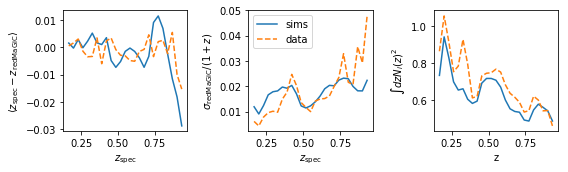

In [46]:
import pickle
def save_obj(name, obj):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)
        
def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)#, encoding='latin1')
    
import numpy as np
edg = np.linspace(0.15,0.95,26)
path_to_save = '/global/cscratch1/sd/mgatti/clustering_z/data/'


mead,ssd,mead_hld,ssd_hd,mead_hl,ssd_hl,mead_hll,ssd_hll = load_obj(path_to_save+'/resume_sims')
'''
mead = np.zeros(25)
ssd = np.zeros(25) 

mead_hd = np.zeros(25)
ssd_hd = np.zeros(25) 


mead_hl = np.zeros(25)
ssd_hl = np.zeros(25) 

mead_hll = np.zeros(25)
ssd_hll = np.zeros(25) 


mead = np.zeros(25)
ssd = np.zeros(25) 

for i in range(25):
    mask = (zredmagic_tot>edg[i]) & ((zredmagic_tot<edg[i+1]))
    mead[i] = np.mean(zredmagic_tot[mask])-np.mean(zspec_tot[mask])
    ssd[i] = np.std(zredmagic_tot[mask]-zspec_tot[mask])
for i in range(25):
    print (i)
    mask = (zredmagic_tot_hd>edg[i]) & ((zredmagic_tot_hd<edg[i+1]))
    mead_hd[i] = np.mean(zredmagic_tot_hd[mask])-np.mean(zspec_tot_hd[mask])
    ssd_hd[i] = np.std(zredmagic_tot_hd[mask]-zspec_tot_hd[mask])
for i in range(25):
    print (i)
    mask = (zredmagic_tot_hl>edg[i]) & ((zredmagic_tot_hl<edg[i+1]))
    mead_hl[i] = np.mean(zredmagic_tot_hl[mask])-np.mean(zspec_tot_hl[mask])
    ssd_hl[i] = np.std(zredmagic_tot_hl[mask]-zspec_tot_hl[mask])
for i in range(25):
    print (i)
    mask = (zredmagic_tot_hll>edg[i]) & ((zredmagic_tot_hll<edg[i+1]))
    mead_hll[i] = np.mean(zredmagic_tot_hll[mask])-np.mean(zspec_tot_hll[mask])
    ssd_hll[i] = np.std(zredmagic_tot_hll[mask]-zspec_tot_hll[mask])
     
'''


import h5py
import numpy as np

mastercat_v = '12_3_19'

path_mastercat = '/project/projectdirs/des/www/y3_cats/Y3_mastercat_'+mastercat_v+'.h5'
path_to_save = '/global/cscratch1/sd/mgatti/clustering_z/data/'


mastercat_data = h5py.File(path_mastercat,'r')
select = np.array(mastercat_data['index']['redmagic']['combined_sample_fid']['select'])
data_zredmagic_tot = np.array(mastercat_data['catalog']['redmagic']['combined_sample_fid']['zredmagic'])[select]
data_zspec_tot= np.array(mastercat_data['catalog']['redmagic']['combined_sample_fid']['zspec'])[select]
data_zredmagic_tot = data_zredmagic_tot[data_zspec_tot>-1]
data_zspec_tot = data_zspec_tot[data_zspec_tot>-1]




select = np.array(mastercat_data['index']['redmagic']['higherlum']['select'])
data_zredmagic_tot_hll = np.array(mastercat_data['catalog']['redmagic']['higherlum']['zredmagic'])[select]
data_zspec_tot_hll= np.array(mastercat_data['catalog']['redmagic']['higherlum']['zspec'])[select]
data_zredmagic_tot_hll = data_zredmagic_tot_hll[data_zspec_tot_hll>-1]
data_zspec_tot_hll = data_zspec_tot_hll[data_zspec_tot_hll>-1]


select = np.array(mastercat_data['index']['redmagic']['highlum']['select'])
data_zredmagic_tot_hl = np.array(mastercat_data['catalog']['redmagic']['highlum']['zredmagic'])[select]
data_zspec_tot_hl= np.array(mastercat_data['catalog']['redmagic']['highlum']['zspec'])[select]
data_zredmagic_tot_hl = data_zredmagic_tot_hl[data_zspec_tot_hl>-1]
data_zspec_tot_hl = data_zspec_tot_hl[data_zspec_tot_hl>-1]



data_mead = np.zeros(25)
data_ssd = np.zeros(25) 
data_mead_hd = np.zeros(25)
data_ssd_hd = np.zeros(25) 
data_mead_hl = np.zeros(25)
data_ssd_hl = np.zeros(25) 
data_mead_hll = np.zeros(25)
data_ssd_hll = np.zeros(25) 
data_mead = np.zeros(25)
data_ssd = np.zeros(25) 
[corr_sims_hr,corr_data] = load_obj(path_to_save+'/corr_bias_n2')

for i in range(25):
    mask = (data_zredmagic_tot>edg[i]) & ((data_zredmagic_tot<edg[i+1]))
    data_mead[i] = np.mean(data_zredmagic_tot[mask])-np.mean(data_zspec_tot[mask])
    data_ssd[i] = np.std(data_zredmagic_tot[mask]-data_zspec_tot[mask])
for i in range(25):
    
    mask = (data_zredmagic_tot_hl>edg[i]) & ((data_zredmagic_tot_hl<edg[i+1]))
    data_mead_hl[i] = np.mean(data_zredmagic_tot_hl[mask])-np.mean(data_zspec_tot_hl[mask])
    data_ssd_hl[i] = np.std(data_zredmagic_tot_hl[mask]-data_zspec_tot_hl[mask])
for i in range(25):
    
    mask = (data_zredmagic_tot_hll>edg[i]) & ((data_zredmagic_tot_hll<edg[i+1]))
    data_mead_hll[i] = np.mean(data_zredmagic_tot_hll[mask])-np.mean(data_zspec_tot_hll[mask])
    data_ssd_hll[i] = np.std(data_zredmagic_tot_hll[mask]-data_zspec_tot_hll[mask])
     
edg_center = 0.5*(edg[1:]+edg[:-1])
fig, ax = plt.subplots(1,3, figsize=(8,2.5))

ax[0].plot(edg_center,mead_hll,label = 'sims')

ax[0].plot(edg_center,data_mead_hll,label = 'data',linestyle='dashed')
ax[1].plot(edg_center,ssd_hll/(1.+edg_center),label = 'sims')
ax[1].plot(edg_center,data_ssd_hll/(1.+edg_center),label = 'data',linestyle='dashed')


ax[2].plot(edg_center,corr_sims_hr,label = 'sims')
ax[2].plot(edg_center,corr_data,label = 'data',linestyle='dashed')
#ax[0].plot(data_mead,label = 'combined',linestyle='dashed')
#ax[1].plot(data_ssd,label = 'combined',linestyle='dashed')
ax[1].legend()
ax[0].set_xlabel(r'$z_{\rm spec}$')
ax[1].set_xlabel(r'$z_{\rm spec}$')
ax[2].set_xlabel('z')

ax[0].set_ylabel(r'$\langle z_{\rm spec}-z_{\rm redMaGiC} \rangle$')
ax[1].set_ylabel(r'$\sigma_{\rm redMaGiC}/(1+z) $')
ax[2].set_ylabel(r'$\int dz N_{i}(z)^2$')
plt.tight_layout()
plt.savefig('unc.pdf')

# sims : make eboss

In [ ]:
import pyfits as pf
import numpy as np
mute = pf.open("/global/cscratch1/sd/mgatti/clustering_z/eBOSS_BOSS_all5_v5-6july19_y3cuts_totweight.fits")

nside = 1024
pix_mask = convert_to_pix_coord(mute[1].data['ra'],mute[1].data['dec'], nside=1024,nest=False)



# select Buzzard with a given redshift distribution!

# add cuts **************
path_to_save = '/global/cscratch1/sd/mgatti/clustering_z/data/'
version = 'v1.9.8_Y3a'
mastercat = h5py.File('/global/cscratch1/sd/jderose/BCC/Chinchilla/Herd/Chinchilla-3/sampleselection/Y3a_old/Buzzard-3_+'version+'_mastercat.h5','r')

zb = np.array(mastercat['catalog']['bpz'][u'unsheared']['z'])[mastercat['index']['maglim']['select']]
rab = np.array(mastercat['catalog']['gold'][u'ra'])[mastercat['index']['maglim']['select']]
decb = np.array(mastercat['catalog']['gold'][u'dec'])[mastercat['index']['maglim']['select']]


pix_buzz = convert_to_pix_coord(rab,decb, nside=1024,nest=False)

mask = np.in1d(pix_buzz,pix_mask)
ra_buzz = rab[mask]
dec_buzz = decb[mask]
z_buzz = zb[mask]



# random draw from a distribution ****************
hx,be=np.histogram(mute[1].data['z'], bins = np.linspace(0.1,1.1,50),normed=True)

hz,_ = np.histogram(z_buzz, bins = np.linspace(0.1,1.1,50),normed=True)
w = ((hx/hz)/np.sum((hx/hz))*len(mute[1].data['z'])/np.sum((hx/hz)/np.sum((hx/hz)))).astype(int)
wh = ((z_buzz -0.1)/(be[1]-be[0])).astype(int)
new_z = []
new_ra = []
new_dec = []
idd = np.random.randint(0,len(z_buzz),len(mute[1].data['z']))
new_z = z_buzz[idd]
new_ra = ra_buzz[idd]
new_dec = dec_buzz[idd]
"""
for wx in range(50-1):
    #try:
        maski = wh==wx
        index = np.random.randint(0,len(z_buzz[maski]),w[wx])
        new_z=np.hstack([new_z,np.array(z_buzz[maski][index])])
        new_ra=np.hstack([new_ra,np.array(ra_buzz[maski][index])])
        new_dec=np.hstack([new_dec,np.array(dec_buzz[maski][index])]) 
#plt.scatter()
"""
# create randoms *****************
ra_rndm = np.array(mastercat['randoms']['maglim']['ra'])
dec_rndm = np.array(mastercat['randoms']['maglim']['dec'])

pix_buzz = convert_to_pix_coord(ra_rndm,dec_rndm, nside=1024,nest=False)

mask = np.in1d(pix_buzz,pix_mask)
ra_rndm = ra_rndm[mask]
dec_rndm = dec_rndm[mask]

print ("done")
# *********************************************


from astropy.table import Table
import os
folder = "/global/cscratch1/sd/mgatti/clustering_z/data/"
path = folder + 'eboss_buzzard.fits'
try:
    os.remove(path)
except:
    pass
idd = np.random.randint(0,len(new_ra),300000)
fits_f = Table()
fits_f['ra'] = new_ra[idd]
fits_f['dec'] = new_dec[idd]
fits_f['e1'] = np.ones(len(new_ra[idd]))
fits_f['e2'] = np.ones(len(new_ra[idd]))
fits_f['z'] = new_z[idd]
fits_f['tomo_bin'] = np.ones(len(new_ra[idd]))

fits_f.write(path)


folder = "/global/cscratch1/sd/mgatti/clustering_z/data/"
path = folder + 'eboss_randoms_buzzard.fits'
try:
    os.remove(path)
except:
    pass
fits_f = Table()
fits_f['ra'] =ra_rndm
fits_f['dec'] = dec_rndm

fits_f.write(path)
'''
mastercat = h5py.File('/global/homes/j/jderose/cscratch/BCC/Chinchilla/Herd/Chinchilla-3/sampleselection/Y3a/Buzzard-3_v1.9.8_Y3a_mastercat.h5')
decrm = np.array(mastercat['catalog'][ 'redmagic']['combined_sample_fid']['dec'])
rarm = np.array(mastercat['catalog'][ 'redmagic']['combined_sample_fid']['ra'])
zspecrm = np.array(mastercat['catalog'][ 'redmagic']['combined_sample_fid']['zspec'])
zredmagic =np.array( mastercat['catalog'][ 'redmagic']['combined_sample_fid']['zredmagic'])
weight = np.array(mastercat['catalog'][ 'redmagic']['combined_sample_fid']['weights'])
id_obj = np.array(mastercat['catalog'][ 'redmagic']['combined_sample_fid']['coadd_object_id'])

pix_buzz = convert_to_pix_coord(rarm,decrm, nside=1024,nest=False)
mask = np.in1d(pix_buzz,pix_mask)
from astropy.table import Table
path = folder + '/redMagic_Y3_eboss.fits'
try:
    os.remove(path)
except:
    pass
fits_f = Table()
fits_f['RA'] = rarm[mask]
fits_f['DEC'] = decrm[mask]
fits_f['ZREDMAGIC'] = zredmagic[mask]
fits_f['Z'] = zspecrm[mask]
fits_f['weight'] = weight[mask]
fits_f.write(path)
'''




ra_rm_rand = np.array(mastercat['randoms']['redmagic']['combined_sample_fid']['ra'])
dec_rm_rand = np.array(mastercat['randoms']['redmagic']['combined_sample_fid']['dec'])

pix_buzz = convert_to_pix_coord(ra_rm_rand,dec_rm_rand, nside=1024,nest=False)
mask = np.in1d(pix_buzz,pix_mask)
from astropy.table import Table
path = folder + '/redMagic_Y3_randoms_eboss.fits'
try:
    os.remove(path)
except:
    pass
fits_f = Table()
fits_f['RA'] = ra_rm_rand[mask]
fits_f['DEC'] = dec_rm_rand[mask]
fits_f.write(path)

mastercat.close()
